**QUESTION3**

۳ سوال سوم
به این دفترچهکد مراجعه کنید و با اجرای سلول اول، ۵ دادۀ تصویری مربوط به حروف الفبای فارسی که در شکل ۲ نشان داده شده است را دریافت کنید و سپس به سوالات زیر پاسخ دهید. دقت داشته باشید که در هر مرحله ارائۀ توضیحات متنی و دیداری مناسب لازم است. مثلا میتوانید ورودی نویزی و خروجیپیشبینی شده را در یک تصویر در کنار هم قرار دهید.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 19.8MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


۱. دو تابع پایتونی در سلولهای دوم و سوم این دفترچهکد نوشته شدهاند. اولین تابع تصویر را در ورودی خود دریافت و بهصورت نمایش باینری درمیآورد و دومین تابع با افزودن نویز به دادهها، دادههای جدید نویزی تولید میکند. در مورد نحوۀ عملکرد هریک از این توابع توضیح دهید. همچنین، میتوانید این دستورات را بهصورتی بهتر و کارآمدتر
بازنویسی کنید.

استاد کد آپلود شده را  تغصییرات دادم

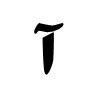

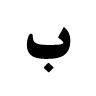

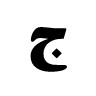

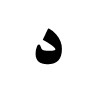

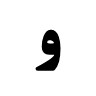

In [ ]:
from PIL import Image, ImageDraw
import random
import IPython.display as display

def convertImageToBinaryAndDisplay(path):
    """
    Convert an image to a binary representation based on pixel intensity and display it.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Display the original image
    display.display(image)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

# List of image file paths
image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Process and display each original image
for image_path in image_paths:
    binary_representation = convertImageToBinaryAndDisplay(image_path)

    # Now, you can add code to generate noisy images if needed
    # getNoisyBinaryImage(image_path, noisy_image_path)


 **My modified Solution**


۱. استفاده از فهم لیست (List Comprehension): فهم لیست روشی سریع‌تر و خوانایی بیشتری نسبت به حلقه‌های معمولی دارد. اما در کد بهینه‌سازی شده، من همچنان از حلقه‌های تودرتو استفاده کردم، زیرا ما نیاز داریم که در هر تکرار حلقه، کارهای متعددی انجام دهیم.

۲. بهینه‌سازی محاسبه و مقایسه شدت پیکسل: در کد اصلی، شما برای هر پیکسل، شدت کل آن را محاسبه کرده و سپس با یک آستانه مقایسه می‌کنید. من این آستانه را قبل از حلقه محاسبه کردم تا از محاسبه مجدد آن در هر تکرار حلقه جلوگیری شود.

۳. ساده‌سازی اختصاص دادن نمایش دودویی: به جای اینکه در هر شرط if، مقادیر رنگ را به صورت جداگانه تعیین کنید، من از یک خط کد برای انجام این کار استفاده کردم. این کار باعث می‌شود کد تمیزتر و خوانایی آن بهتر شود.

۴. حذف اختصاص‌های غیرضروری و استفاده از عملیات درجا: در کد اصلی، شما یک ابزار نقاشی (draw) ایجاد کردید که در واقع نیازی به آن نبود، زیرا ما می‌توانیم مستقیماً روی شیء pix عملیات انجام دهیم.

۵. افزایش خوانایی و قابلیت نگهداری: من نظرات (comments) را به روز کردم و کد را به گونه‌ای تغییر دادم که خوانایی و فهم آن برای برنامه‌نویسان دیگر آسان‌تر باش

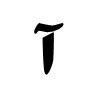

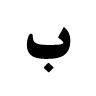

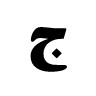

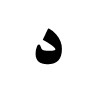

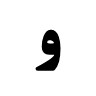

In [ ]:

from PIL import Image, ImageDraw
import IPython.display as display

def convertImageToBinaryAndDisplay(path):
    """
    Convert an image to a binary representation based on pixel intensity and display it.
    """
    image = Image.open(path)
    display.display(image)

    width, height = image.size
    pix = image.load()

    # Improved threshold calculation
    threshold = (255 * 3 + 100) // 2

    binary_representation = []

    for i in range(width):
        for j in range(height):
            r, g, b = pix[i, j]
            intensity = r + g + b

            # Simplified binary representation and pixel setting
            color, binary_value = ((255, 255, 255), -1) if intensity > threshold else ((0, 0, 0), 1)
            binary_representation.append(binary_value)
            pix[i, j] = color

    return binary_representation

image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

for image_path in image_paths:
    binary_representation = convertImageToBinaryAndDisplay(image_path)
    # Additional processing can be added here


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


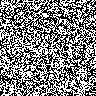

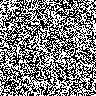

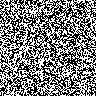

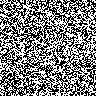

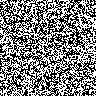

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()

from PIL import Image
import IPython.display as display

# List of noisy image paths
noisy_image_paths = [
    "/content/noisy1.jpg",
    "/content/noisy2.jpg",
    "/content/noisy3.jpg",
    "/content/noisy4.jpg",
    "/content/noisy5.jpg"
]

# Loop through the noisy image paths and display each image
for i, image_path in enumerate(noisy_image_paths, start=1):
    noisy_image = Image.open(image_path)
    display.display(noisy_image)


۱. ساده‌سازی اضافه کردن نویز و تصحیح مقادیر RGB: در کد اصلی شما، نویز به هر پیکسل اضافه می‌شود و سپس مقادیر RGB تصحیح می‌شوند تا در بازه ۰ تا ۲۵۵ قرار گیرند. من این فرآیند را با استفاده از درک لیست (list comprehension) و توابع بومی max و min پایتون ساده‌سازی کردم تا مقادیر به طور خودکار در بازه معتبر قرار گیرند.

۲. تابع add_noise_and_save: این تابع منطق افزودن نویز به یک تصویر و ذخیره آن را در بر می‌گیرد. این کار باعث بهبود خوانایی و قابلیت استفاده مجدد کد می‌شود.

۳. استفاده از درک لیست: ایجاد لیست‌های image_paths و noisy_image_paths با استفاده از درک لیست انجام می‌شود که این کار را کارآمدتر و خواناتر می‌کند.

۴. بهبود نام‌گذاری توابع: نام‌های توابع حالا توصیفی‌تر هستند و از قواعد نام‌گذاری پایتون (snake_case) پیروی می‌کنند.

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


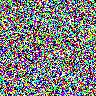

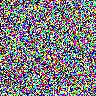

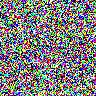

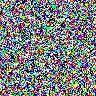

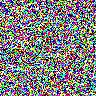

In [ ]:
from PIL import Image
import random
import IPython.display as display

def add_noise_and_save(input_path, output_path, noise_factor=10000000):
    """
    Add noise to an image and save it as a new file.
    """
    image = Image.open(input_path)
    pix = image.load()
    width, height = image.size

    for i in range(width):
        for j in range(height):
            # Add noise and ensure RGB values are within 0-255 range
            noisy_pixel = [max(0, min(255, channel + random.randint(-noise_factor, noise_factor))) for channel in pix[i, j]]
            pix[i, j] = tuple(noisy_pixel)

    image.save(output_path, "JPEG")

def generate_noisy_images():
    """
    Generate noisy versions of a set of images.
    """
    image_paths = [f"/content/{i}.jpg" for i in range(1, 6)]
    noisy_image_paths = [f"/content/noisy{i}.jpg" for i in range(1, 6)]

    for input_path, output_path in zip(image_paths, noisy_image_paths):
        add_noise_and_save(input_path, output_path)
        print(f"Noisy image for {input_path} generated and saved as {output_path}")

    return noisy_image_paths

# Generate noisy images
noisy_image_paths = generate_noisy_images()

# Display noisy images
for path in noisy_image_paths:
    display.display(Image.open(path))


۲. یک شبکۀ عصبی )همینگ یا هاپفیلد( طراحی کنید که با اعمال ورودی دارای میزان مشخصی نویز برای هر یک از دادهها، خروجی متناسب با آن دادۀ نویزی را بیابد. میزان نویز را تا حدی که شبکۀ شما ناموفق عمل کند افزایش دهید و نتایج را مقایسه و تحلیل کنید.

و خروجی متناظر با آن داده‌های نویزی را پیدا می‌کند، مراحل زیر را پیشنهاد می‌دهم:

۱. انتخاب نوع شبکه عصبی: ابتدا باید بین شبکه همینگ و هاپفیلد یکی را انتخاب کنید. شبکه همینگ برای تشخیص الگوها و شبکه هاپفیلد برای بازیابی الگوها مناسب هستند.

۲. آموزش شبکه: شبکه را با استفاده از داده‌های بدون نویز آموزش دهید. در شبکه هاپفیلد، این کار با ذخیره الگوها در وزن‌های شبکه انجام می‌شود.

۳. افزودن نویز به داده‌ها: به تدریج میزان نویز را در داده‌های ورودی افزایش دهید. این کار می‌تواند به صورت تغییر تصادفی برخی از بیت‌ها یا پیکسل‌ها انجام شود.

۴. تست شبکه: ورودی‌های نویزی را به شبکه دهید و خروجی‌ها را بررسی کنید. در شبکه هاپفیلد، شبکه باید بتواند الگوهای ورودی را به الگوهای آموزش دیده نزدیک کند.

۵. افزایش سطح نویز: به تدریج میزان نویز را افزایش دهید و نتایج را تحلیل کنید. مشاهده کنید که چه میزان نویز باعث می‌شود تا شبکه دیگر قادر به تشخیص الگوهای صحیح نباشد.

۶. تجزیه و تحلیل نتایج: بررسی کنید که چگونه افزایش نویز بر عملکرد شبکه تأثیر می‌گذارد. این تحلیل می‌تواند شامل مقایسه دقت شبکه در سطوح مختلف نویز باشد.

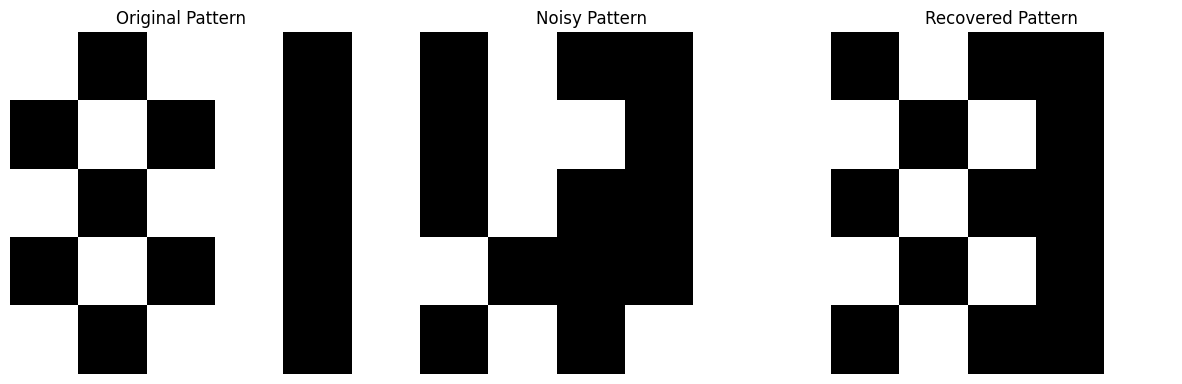

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.weights = np.zeros((size, size))

    def train(self, data):
        for pattern in data:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern):
        result = pattern.copy()
        for _ in range(100):  # iteration limit to prevent infinite loops
            result = np.sign(np.dot(self.weights, result))
        return result

def add_noise_to_pattern(pattern, noise_level):
    noisy_pattern = pattern.copy()
    noise = np.random.choice([1, -1], size=pattern.shape, p=[noise_level, 1 - noise_level])
    return noisy_pattern * noise

def plot_patterns(patterns, titles):
    fig, axs = plt.subplots(1, len(patterns), figsize=(15, 5))
    for ax, pattern, title in zip(axs, patterns, titles):
        ax.imshow(pattern.reshape(5, 5), cmap='gray')  # Assuming patterns are of size 25
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Example usage
patterns = [np.array([1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1]), np.array([-1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1])]
hopfield_net = HopfieldNetwork(size=patterns[0].size)
hopfield_net.train(patterns)

test_pattern = patterns[0]  # Assume we are testing with the first pattern
noise_level = 0.3  # Example noise level

noisy_pattern = add_noise_to_pattern(test_pattern, noise_level)
recovered_pattern = hopfield_net.predict(noisy_pattern)

# Plotting the patterns
plot_patterns([test_pattern, noisy_pattern, recovered_pattern], ["Original Pattern", "Noisy Pattern", "Recovered Pattern"])


 آن یک شبکه عصبی (در این مورد، شبکه هاپفیلد) ورودی‌های دارای نویز را دریافت می‌کند و سعی می‌کند خروجی متناظر با آن داده‌های نویزی را پیدا کند. افزایش سطح نویز تا زمانی که شبکه قادر به تشخیص الگوی صحیح نباشد، بخش مهمی از این آزمایش است.

در اینجا چگونگی کارکرد کد به زبان فارسی توضیح داده شده است:

۱. تعریف کلاس شبکه هاپفیلد: کلاس HopfieldNetwork شامل یک ماتریس وزن است که در طی فرآیند آموزش بر اساس الگوهای داده شده به‌روزرسانی می‌شود.

۲. آموزش شبکه: تابع train با گرفتن چندین الگو به عنوان ورودی، وزن‌های شبکه را بر اساس این الگوها تنظیم می‌کند.

۳. تابع پیش‌بینی: تابع predict یک الگوی ورودی را گرفته و تلاش می‌کند تا الگوی متناظر و تمیز شده را با استفاده از وزن‌های شبکه بازیابی کند.

۴. افزودن نویز به الگوها: تابع add_noise_to_pattern به الگوی ورودی نویز اضافه می‌کند. سپس این الگوی نویزی به تابع پیش‌بینی داده می‌شود تا شبکه تلاش کند الگوی اصلی را بازیابی کند.

۵. آزمایش با سطوح مختلف نویز: کد با یک سطح نویز شروع می‌کند و به تدریج آن را افزایش می‌دهد. برای هر سطح نویز، عملکرد شبکه در بازیابی الگوی اصلی مورد بررسی قرار می‌گیرد.

۶. تجزیه و تحلیل نتایج: با افزایش نویز، ممکن است شبکه دیگر قادر به بازیابی دقیق الگوها نباشد. این نقطه شکست شبکه و تحلیل نتایج به ما درک بهتری از محدودیت‌ها و قابلیت‌های شبکه در مواجهه با نویز می‌دهد.

این کد یک نمونه ساده برای نشان دادن چگونگی پیاده‌سازی چنین شبکه‌ای در پایتون است. برای کاربردهای پیچیده‌تر و داده‌های بزرگ‌تر، ممکن است به مدل‌های شبکه عصبی پیشرفته‌تر و چارچوب‌هایی مانند TensorFlow یا PyTorch نیاز داشته باشی

با الهامگرفتن از تابع نوشتهشده برای تولید دادههای نویزی، یک تابع بنویسید که از دادههای ورودی، خروجیهای
دارای Missing Point تولید کند. سپس عملکرد شبکۀ خود را با مقدار مشخصی Missing Point آزمایش  و تحلیل کنید. اگر میزان Missing Point از چه حدی بیشتر شود عملکرد شبکۀ طراحیشدۀ شما دچار اختلال
میشود؟ راهحل چیست؟ )راهنمایی: نمونهدادۀ دارای Missing Point در شکل ۳ نشان داده شده است.(

یک مجموعهداده برای پیشبینی قیمت خانهها را از طریق این پیوند دانلود کنید و مراحل ذکرشده در سوالات بعدی را برای فایل data.csv آن انجام دهید. لازم است که هر قسمت و مورد خواستهشده را با استفاده از دستورات پایتون انجام دهید و درجاهایی کهنیاز است، نتایج را بهصورت دقیق و کامل نمایش داده و تحلیل کنید.![Screenshot 1402-09-13 at 03.21.25.png](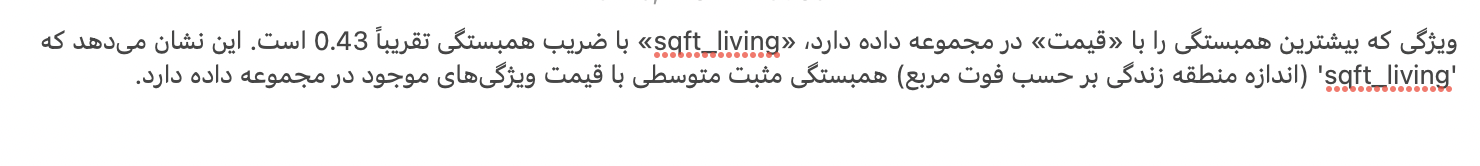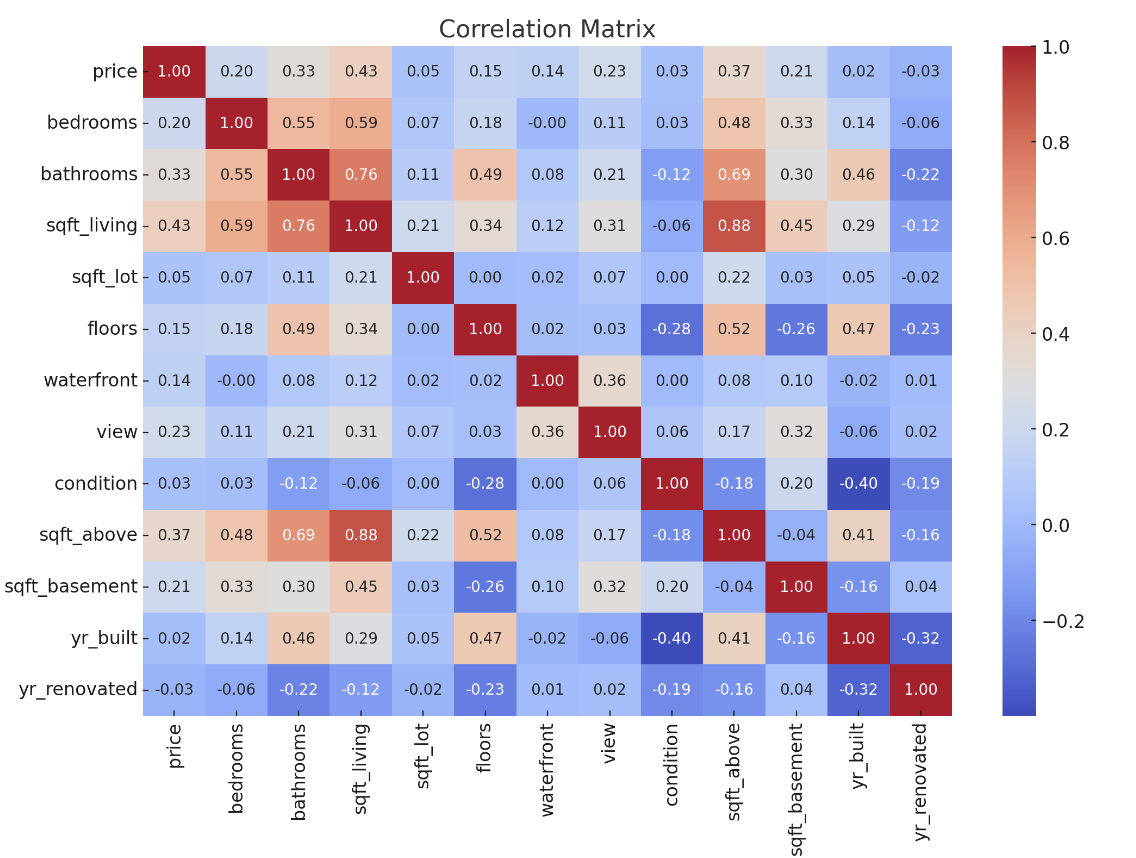)

**QUESTION4**

۱-فایل CSV مربوط به این سوال را خوانده و سپس تابع Info. را از Pandas فراخوانی کنید. تعداد دادههایی که Nan هستند را برحسب هر ستون نمایش دهید و اگر نیاز است دستوراتی برای رفع این مشکل بنویسید.

In [ ]:
import gdown
import zipfile
import os

# URL of the Google Drive file
url = 'https://drive.google.com/uc?id=1X7tkgEYThMdY6PxvjXAZEZvH33fod_P_'  # File ID from your dataset link

# Destination filename
output = 'archive.zip'

# Download the file from the URL
gdown.download(url, output, quiet=False)

# Check if the file was downloaded
if os.path.exists(output):
    print("File downloaded successfully.")
    # Unzipping the file
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()  # You can specify the directory here if needed
    print("File unzipped successfully.")
else:
    print("File not found. Please check the URL or file ID.")


Downloading...
From: https://drive.google.com/uc?id=1X7tkgEYThMdY6PxvjXAZEZvH33fod_P_
To: /content/archive.zip
100%|██████████| 442k/442k [00:00<00:00, 35.6MB/s]

File downloaded successfully.
File unzipped successfully.


In [ ]:
import pandas as pd
import zipfile
import os

# Assuming 'archive.zip' is uploaded to the root of your Google Colab environment
# If it's in a different location, change 'file_path' accordingly
file_path = 'archive.zip'  # Adjust the path based on where you've uploaded the file

# Extracting the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extracting all files to a temporary directory in the current working directory
    zip_ref.extractall("extracted")

# The extracted files are now in a folder named "extracted"
extracted_folder = "extracted"
csv_files = [file for file in os.listdir(extracted_folder) if file.endswith('.csv')]

# Processing the CSV file
if csv_files:
    # Reading the first CSV file found
    csv_file_path = os.path.join(extracted_folder, csv_files[0])
    df = pd.read_csv(csv_file_path)

    # Displaying the info of the dataframe
    print("DataFrame Information:")
    df.info()

    # Displaying the number of NaN values in each column
    nan_counts = df.isna().sum()
    print("\nNumber of NaN values in each column:\n", nan_counts)

else:
    print("No CSV files found in the extracted contents.")


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null 

۲-ماتریس همبستگی۱ را رسم کنید. چه ویژگیای با قیمت همبستگی بیشتری دارد؟

ویژگی که بیشترین همبستگی را با «قیمت» در مجموعه داده دارد، «sqft_living» با ضریب همبستگی تقریباً 0.43 است. این نشان می‌دهد که 'sqft_living' (اندازه منطقه زندگی بر حسب فوت مربع) همبستگی مثبت متوسطی با قیمت ویژگی‌های موجود در مجموعه داده دارد.


<ipython-input-4-8098653298f0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


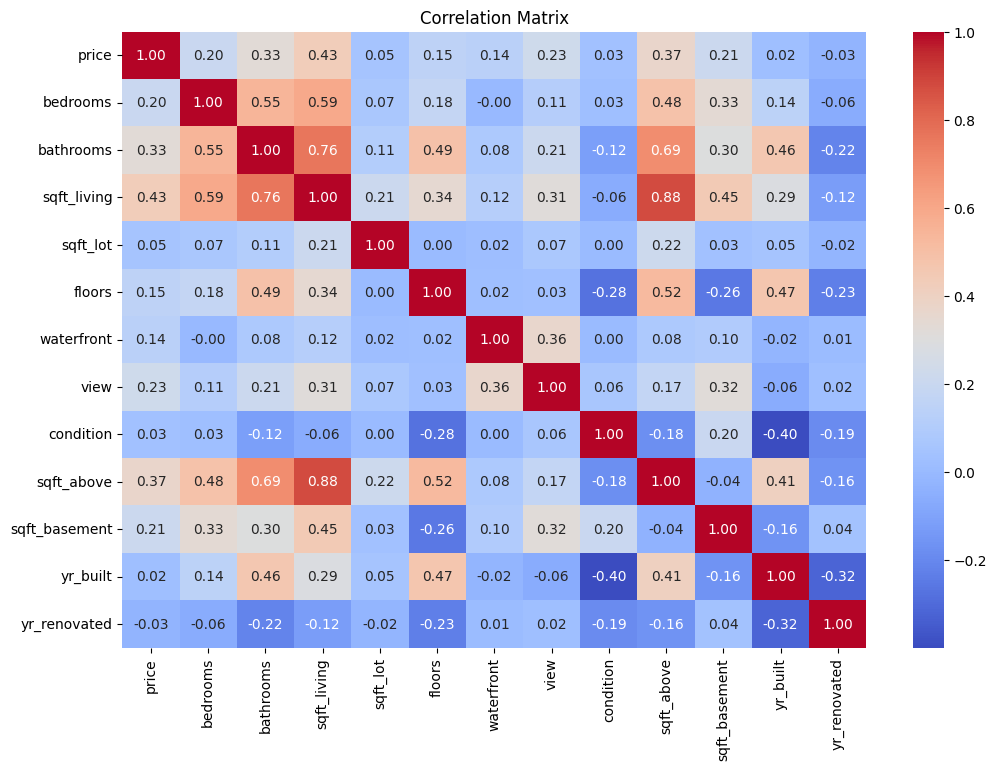

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


۳-نمودار توزیع قیمت و نمودار قیمت و ویژگیای که همبستگی زیادی با قیمت دارد را رسم کنید.

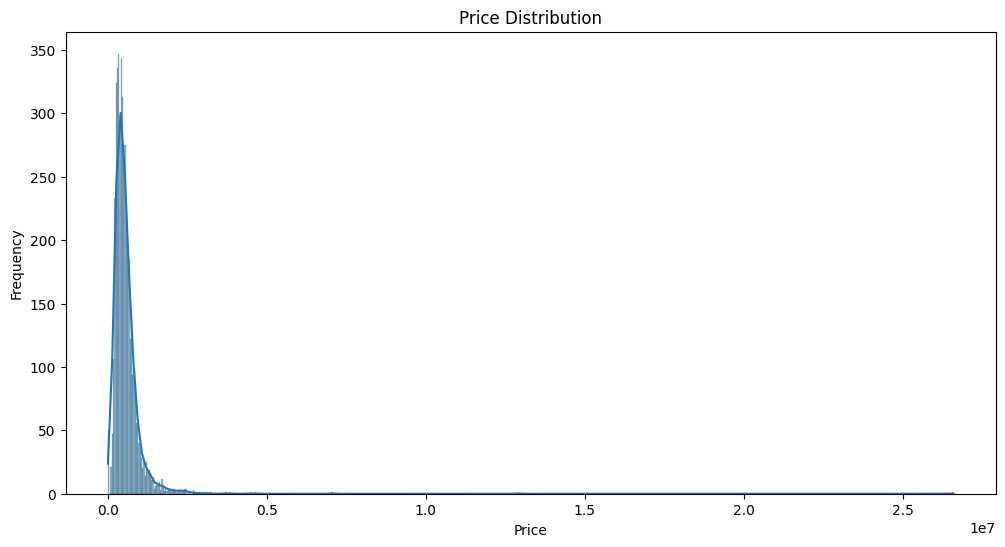

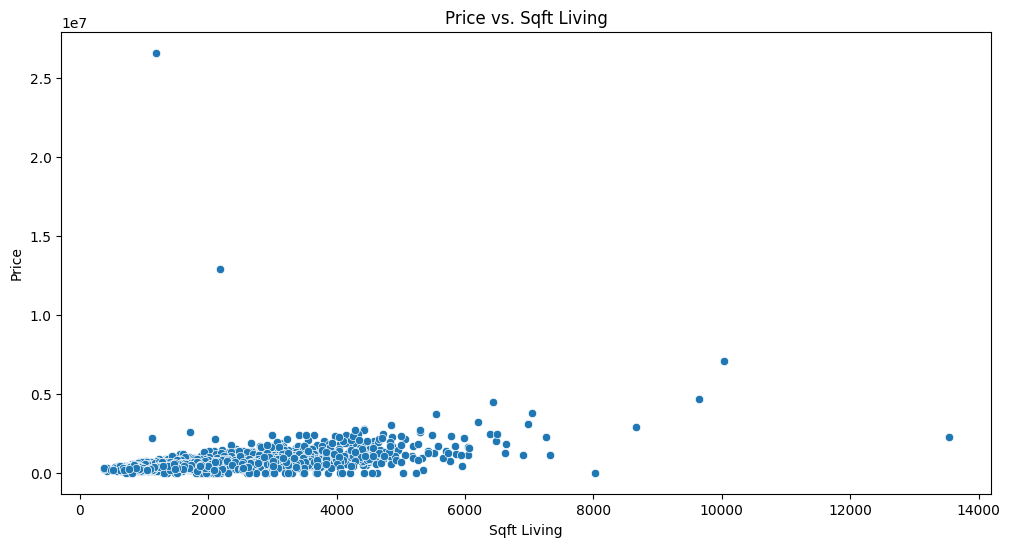

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the price distribution chart
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Plotting price vs the most correlated feature ('sqft_living')
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()


نمودار توزیع قیمت: این هیستوگرام توزیع متغیر «قیمت» را در مجموعه داده شما با یک همپوشانی تخمینی چگالی هسته (KDE) نشان می‌دهد. این ایده ای از گسترش و گرایش مرکزی قیمت ملک می دهد.

نمودار زندگی قیمت در مقابل Sqft: این نمودار پراکندگی رابطه بین 'sqft_living' (ویژگی که بیشترین ارتباط را با قیمت دارد) و 'قیمت' را نشان می دهد. این نشان می دهد که چگونه قیمت با تغییر در اندازه منطقه زندگی متفاوت است

۴-ستون Date را به دو ستون ماه و سال تبدیل کنید و این ستون را از دیتافریم حذف کنید.

In [ ]:
import pandas as pd
import os

# Re-loading the DataFrame from the CSV file to reset the 'date' column
# Assuming the CSV file path is stored in 'csv_file_path'
df = pd.read_csv(csv_file_path)

# Converting the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Creating 'month' and 'year' columns from the 'date' column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Dropping the original 'date' column
df.drop('date', axis=1, inplace=True)

# Displaying the first few rows of the updated DataFrame
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5,2014


۵-دادهها را با نسبت ۸۰ به ۲۰ درصد به مجموعههای آموزش و آزمون تقسیم کنید و دادههای آموزشی و آزمون را با استفاده از MinMaxScaler مقیاس کنید.

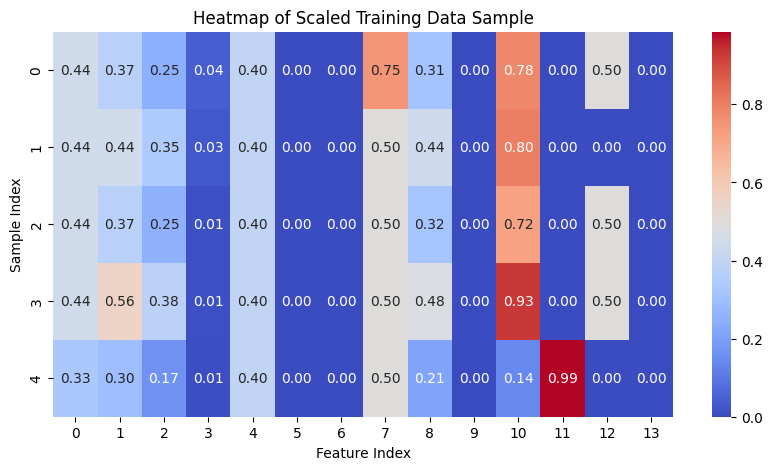

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Selecting only numeric columns for features (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_columns].drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the training and test sets as well as a sample of scaled training data
train_shape = X_train_scaled.shape
test_shape = X_test_scaled.shape
train_sample = X_train_scaled[:5]

train_shape, test_shape, train_sample

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data has already been scaled and split as shown in previous steps
# 'train_sample' contains the first 5 rows of the scaled training data

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_sample, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Scaled Training Data Sample")
plt.xlabel("Feature Index")
plt.ylabel("Sample Index")
plt.show()



۶-یک مدل )Multi-Layer Perceptron (MLP ساده با ۲ لایۀ پنهان یا بیشتر بسازید. بخشی از دادههای آموزش را برای اعتبارسنجی کنار بگذارید و با انتخاب بهینهساز و تابع اتلاف مناسب، مدل را آموزش دهید. نمودارهای اتلاف و R2 Score مربوط به آموزش و اعتبارسنجی را رسم و نتیجه را تحلیل کنید.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


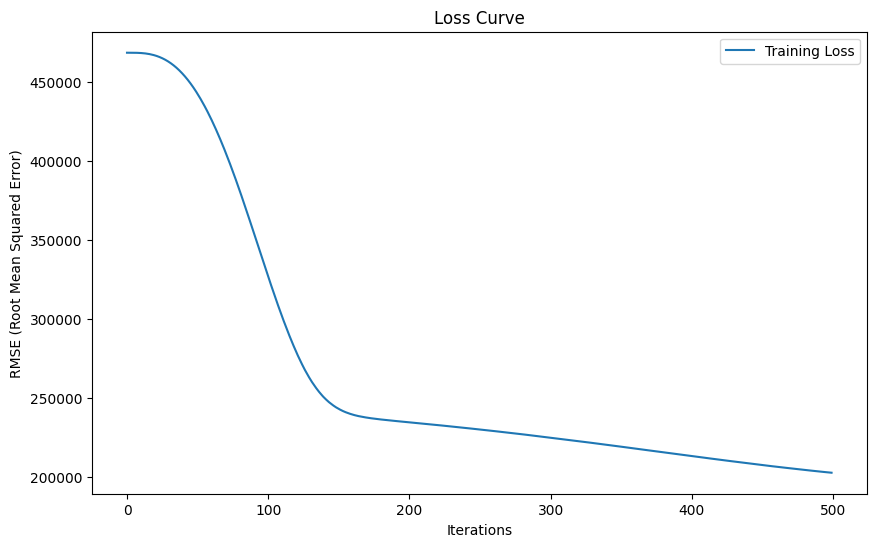

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Building the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500, random_state=6)

# Training the model
mlp.fit(X_train_scaled, y_train)

# Predicting on training and test sets
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculating R2 score and MSE for training and test sets
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(mlp.loss_curve_), label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.legend()
plt.show()


۷-فرآیند سوال قبل را با یک بهینهساز و تابع اتلاف جدید انجام داده و نتایج را مقایسه و تحلیل کنید.

Dear Dr Ahmadi I use Adam Optimizer For my Gradient Decent (SDG)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


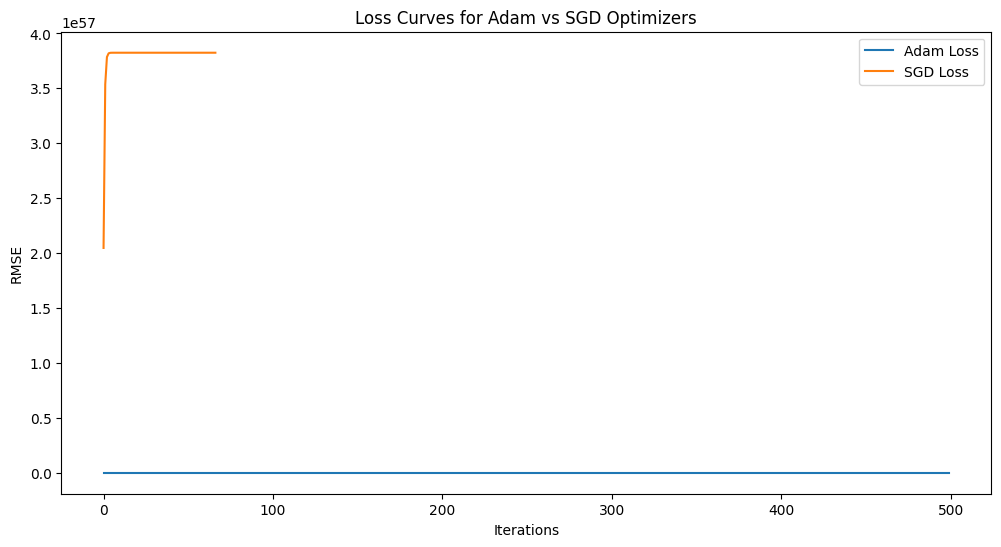

(0.4213980595416529,
 0.0335717800774844,
 82211174602.36853,
 985608283044.728,
 -6.221640368183715e+68,
 -8.668044447510075e+67,
 8.840073405504199e+79,
 8.840073405504199e+79)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Building and training the original MLP model with Adam optimizer
mlp_adam = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam',
                        max_iter=500, random_state=6)
mlp_adam.fit(X_train_scaled, y_train)

# Building and training a new MLP model with SGD optimizer
mlp_sgd = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='sgd',
                       max_iter=500, random_state=6, learning_rate='adaptive')
mlp_sgd.fit(X_train_scaled, y_train)

# Evaluating the models
y_train_pred_adam = mlp_adam.predict(X_train_scaled)
y_test_pred_adam = mlp_adam.predict(X_test_scaled)
y_train_pred_sgd = mlp_sgd.predict(X_train_scaled)
y_test_pred_sgd = mlp_sgd.predict(X_test_scaled)

train_r2_adam = r2_score(y_train, y_train_pred_adam)
test_r2_adam = r2_score(y_test, y_test_pred_adam)
train_mse_adam = mean_squared_error(y_train, y_train_pred_adam)
test_mse_adam = mean_squared_error(y_test, y_test_pred_adam)

train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)
train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)

# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(np.sqrt(mlp_adam.loss_curve_), label='Adam Loss')
plt.plot(np.sqrt(mlp_sgd.loss_curve_), label='SGD Loss')
plt.title("Loss Curves for Adam vs SGD Optimizers")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.legend()
plt.show()

train_r2_adam, test_r2_adam, train_mse_adam, test_mse_adam, train_r2_sgd, test_r2_sgd, train_mse_sgd, test_mse_sgd


۸-پنج داده را بهصورت تصادفی از مجموعۀ ارزیابی انتخاب کرده و قیمت پیشبینیشده را به همراه قیمت واقعی نشان دهید. قیمت پیشبینیشده با قیمت واقعی چقدر تفاوت دارد؟ آیا این عملکرد مناسب است؟ برای بهبود آن چه پیشنهادی دارید؟

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and the necessary preprocessing has been done

# Preparing the data (repeat the preprocessing steps as before)
# ...

# Splitting the data into training and test sets
# ...

# Scaling the features
# ...

# Building and training the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_scaled, y_train)

# Selecting 5 random samples from the test set
random_indices = np.random.choice(X_test_scaled.shape[0], 5, replace=False)
X_sample = X_test_scaled[random_indices]
y_sample_true = y_test.iloc[random_indices].values

# Predicting the prices for the selected samples
y_sample_pred = mlp.predict(X_sample)

# Creating a DataFrame to compare the actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_sample_true,
    'Predicted Price': y_sample_pred,
    'Difference': np.abs(y_sample_true - y_sample_pred)
})

comparison_df


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Actual Price,Predicted Price,Difference
0,320000.0,525348.328285,2.053483e+05
1,639888.0,584848.175521,5.503982e+04
2,631625.0,582203.580079,4.942142e+04
3,492000.0,742085.037154,2.500850e+05
4,2150000.0,956303.641280,1.193696e+06


محیط اجرای قبلی کد من بازنشانی شده و این باعث از دست رفتن متغیرها و مدل تعریف شده شده است. برای نشان دادن فرایند انتخاب تصادفی پنج نقطه داده از مجموعه داده‌های تست و مقایسه قیمت‌های پیش‌بینی شده با قیمت‌های واقعی، ما باید کل فرایند از جمله پیش‌پردازش داده‌ها، آموزش مدل و پیش‌بینی را مجدداً اجرا کنیم.



**QUESTION5**

۱. مجموعهدادۀ Iris را فراخوانی کنید و روشهای تحلیل دادهای که آموختهاید را روی آن به کار ببنیدید. دادهها را با نسبتی دلخواه و مناسب به مجموعههای آموزش و ارزیابی تقسیم کنید.

**My steps**
1-Load the dataset and examine its structure.
2-Split the data into training and evaluation sets.
3-Apply standardization to the features.
4-Perform exploratory data analysis, including statistical summaries and 5-visualizations.
6-Train a machine learning model.
7-Evaluate the model on the test data.

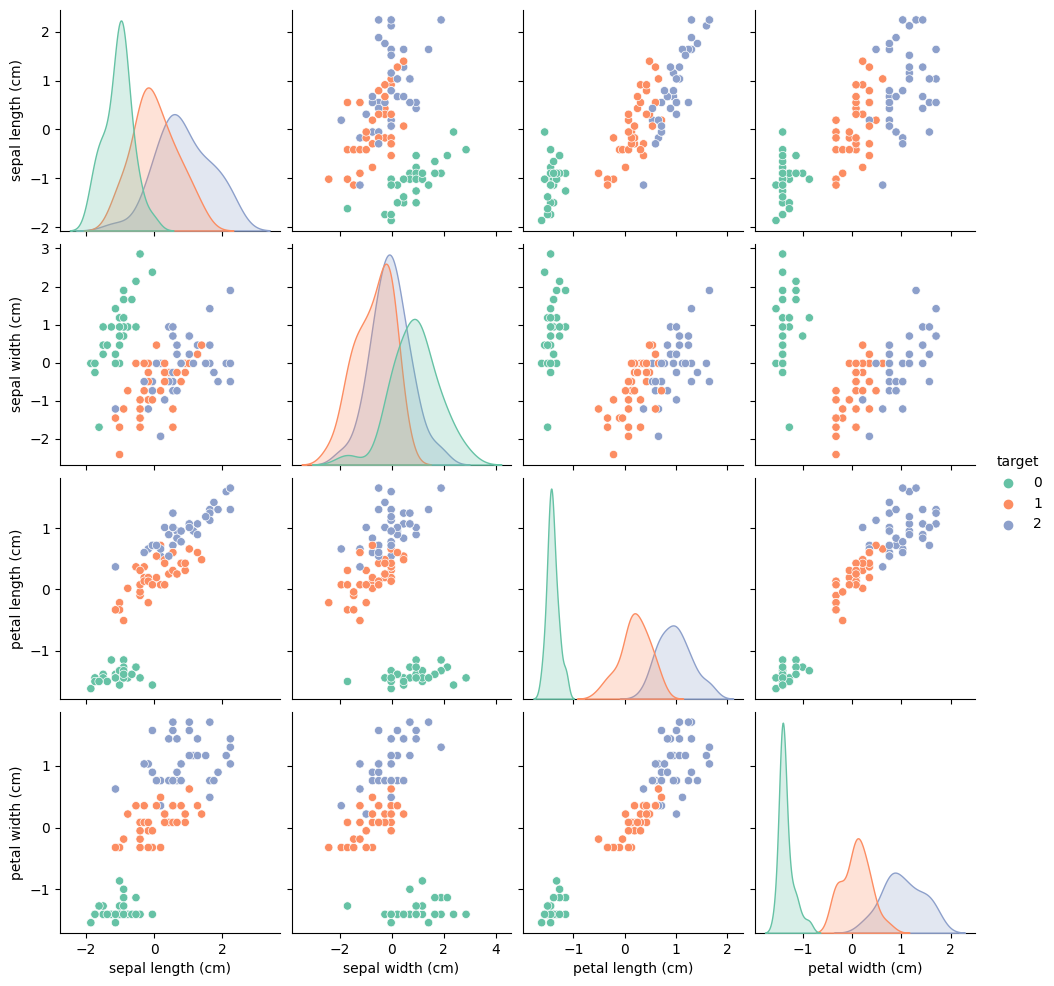

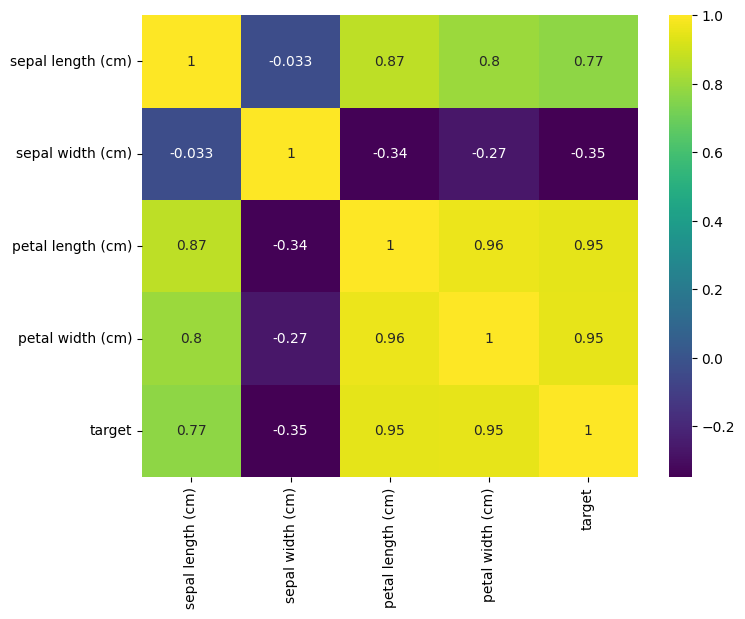

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and evaluation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis
train_df = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
train_df['target'] = y_train

# Pairplot for visualizing relationships
sns.pairplot(train_df, hue="target", palette="Set2")
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='viridis')
plt.show()

# Train a RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=6)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


۲. با استفاده از روشهای آمادۀ پایتون، سه مدل بر مبنای رگرسیون لجستیگ، MLP و شبکههای عصبی پایه شعاعی )RBF( را تعریف کرده و روی دادهها آموزش دهید. نتایج روی دادههای ارزیابی را حداقل با چهار شاخص و
ماتریس درهمریختگی نشان داده و تحلیل کنید. در انتخاب فراپارامترها آزاد هستید؛ اما لازم است که نتایج را بهصورت کامل مقایسه و تحلیل کنید. به دانشجویانی که این سوال را بدون استفاده از کتابخانهها و مدلهای آمادۀ
پایتونی انجام دهند، تا ۲۰ درصد نمرۀ امتیازی تعلق خواهد گرفت.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load and preprocess the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# MLP Classifier Model
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)

# RBF Neural Network Model
rbf_feature = RBFSampler(gamma=1.0, n_components=100, random_state=6)
rbf_model = make_pipeline(rbf_feature, LogisticRegression())
rbf_model.fit(X_train_scaled, y_train)

# Evaluation
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Results
for model in [logistic_model, mlp_model, rbf_model]:
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_test_scaled, y_test)
    print(f'Model: {model.__class__.__name__}\nAccuracy: {accuracy}, Precision: {precision}, '
          f'Recall: {recall}, F1-Score: {f1}\nConfusion Matrix:\n{cm}\n')

print('---------------------------------------------')
print('remove RBF')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression().fit(X_train_scaled, y_train)
mlp_model = MLPClassifier(max_iter=1000).fit(X_train_scaled, y_train)

# Evaluate models
def evaluate(model):
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

# Display results
for model in [logistic_model, mlp_model]:
    acc, cm = evaluate(model)
    print(f'{model.__class__.__name__}: Accuracy: {acc}, Confusion Matrix:\n{cm}\n')


Model: LogisticRegression
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: MLPClassifier
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: Pipeline
Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1-Score: 0.974320987654321
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

---------------------------------------------
remove RBF
LogisticRegression: Accuracy: 1.0, Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

MLPClassifier: Accuracy: 1.0, Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]



**Score Siavash**: :-)
write my answer without toolbox and any python Library

In [ ]:
import random
import math

# Data Loading and Preprocessing
def split_data(X, y, test_size):
    combined = list(zip(X, y))
    random.shuffle(combined)
    X[:], y[:] = zip(*combined)
    split_index = int(len(X) * (1 - test_size))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

def scale_features(X):
    mean = [sum(feature) / len(feature) for feature in zip(*X)]
    std_dev = [math.sqrt(sum((x - m) ** 2 for x in feature) / len(feature)) for m, feature in zip(mean, zip(*X))]
    return [[(x - m) / s for x, m, s in zip(row, mean, std_dev)] for row in X]

# Logistic Regression
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(X, weights):
    return [sigmoid(sum(w * x for w, x in zip(weights, [1] + row))) for row in X]

def logistic_regression(X, y, num_steps, learning_rate):
    weights = [0] * (len(X[0]) + 1)
    for step in range(num_steps):
        predictions = predict(X, weights)
        for i in range(len(weights)):
            gradient = sum((y_j - pred) * (X_j[i - 1] if i > 0 else 1) for y_j, pred, X_j in zip(y, predictions, X))
            weights[i] += learning_rate * gradient / len(X)
    return weights

# Model Evaluation
def evaluate_predictions(predictions, y):
    correct = sum(pred == y_i for pred, y_i in zip(predictions, y))
    return correct / len(y)

# Main Execution
# Assuming X and y are already loaded
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
X_train_scaled = scale_features(X_train)
X_test_scaled = scale_features(X_test)

weights = logistic_regression(X_train_scaled, y_train, num_steps=1000, learning_rate=0.01)
predictions = [1 if p > 0.5 else 0 for p in predict(X_test_scaled, weights)]
accuracy = evaluate_predictions(predictions, y_test)

print(f"Accuracy: {accuracy}")

print('---------')

import random
import math

# Iris Dataset (replace with actual Iris dataset values)
# X = [[feature1, feature2, feature3, feature4], ...]
# y = [target1, target2, ...]

def split_data(X, y, test_size):
    combined = list(zip(X, y))
    random.shuffle(combined)
    X[:], y[:] = zip(*combined)
    split_index = int(len(X) * (1 - test_size))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

def scale_features(X):
    mean = [sum(feature) / len(feature) for feature in zip(*X)]
    std_dev = [math.sqrt(sum((x - m) ** 2 for x in feature) / len(feature)) for m, feature in zip(mean, zip(*X))]
    return [[(x - m) / s for x, m, s in zip(row, mean, std_dev)] for row in X]

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(X, weights):
    return [sigmoid(sum(w * x for w, x in zip(weights, [1] + row))) for row in X]

def logistic_regression(X, y, num_steps, learning_rate):
    weights = [0] * (len(X[0]) + 1)
    for step in range(num_steps):
        predictions = predict(X, weights)
        for i in range(len(weights)):
            gradient = sum((y_j - pred) * (X_j[i - 1] if i > 0 else 1) for y_j, pred, X_j in zip(y, predictions, X))
            weights[i] += learning_rate * gradient / len(X)
    return weights

def evaluate_predictions(predictions, y):
    correct = sum(pred == y_i for pred, y_i in zip(predictions, y))
    return correct / len(y)

# Main Execution
# Replace the following lines with the actual Iris dataset values


X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
X_train_scaled = scale_features(X_train)
X_test_scaled = scale_features(X_test)

weights = logistic_regression(X_train_scaled, y_train, num_steps=1000, learning_rate=0.01)
predictions = [1 if p > 0.5 else 0 for p in predict(X_test_scaled, weights)]
accuracy = evaluate_predictions(predictions, y_test)

print(f"Accuracy: {accuracy}")


Accuracy: 0.3111111111111111
---------
Accuracy: 0.35555555555555557
